In [2]:
import numpy as np
from nz_model import NzModel
import matplotlib.pyplot as plt

from modified_redshift import u_dropout
from modified_redshift import g_dropout
from modified_redshift import r_dropout

In [3]:
z_space = np.arange(0, 7, 0.01)

In [4]:
model = NzModel(z_space)

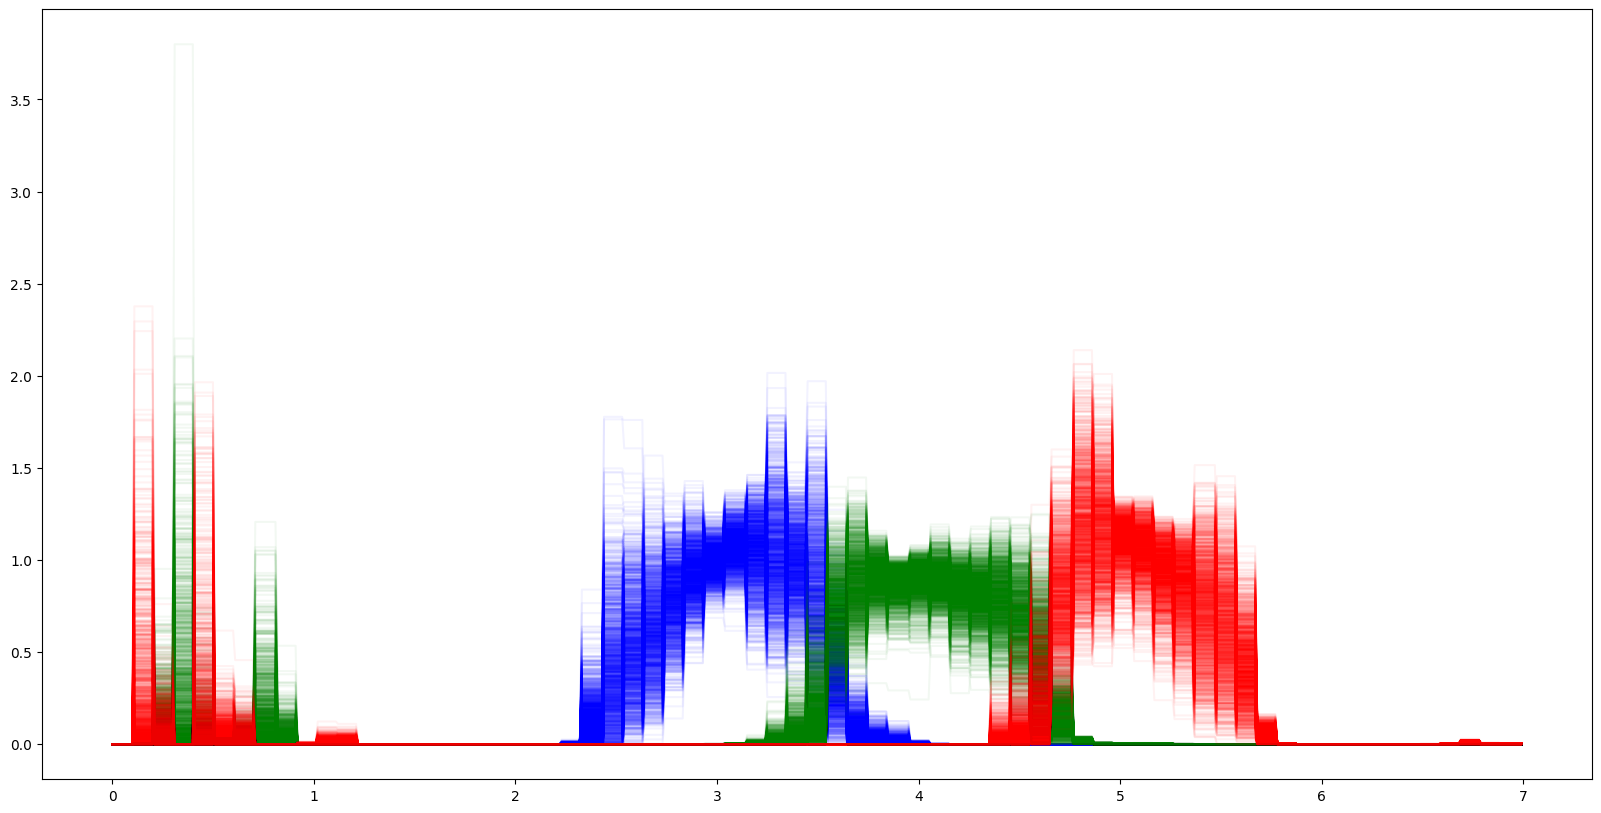

In [5]:
model.plot_all_pca(4, 2000)

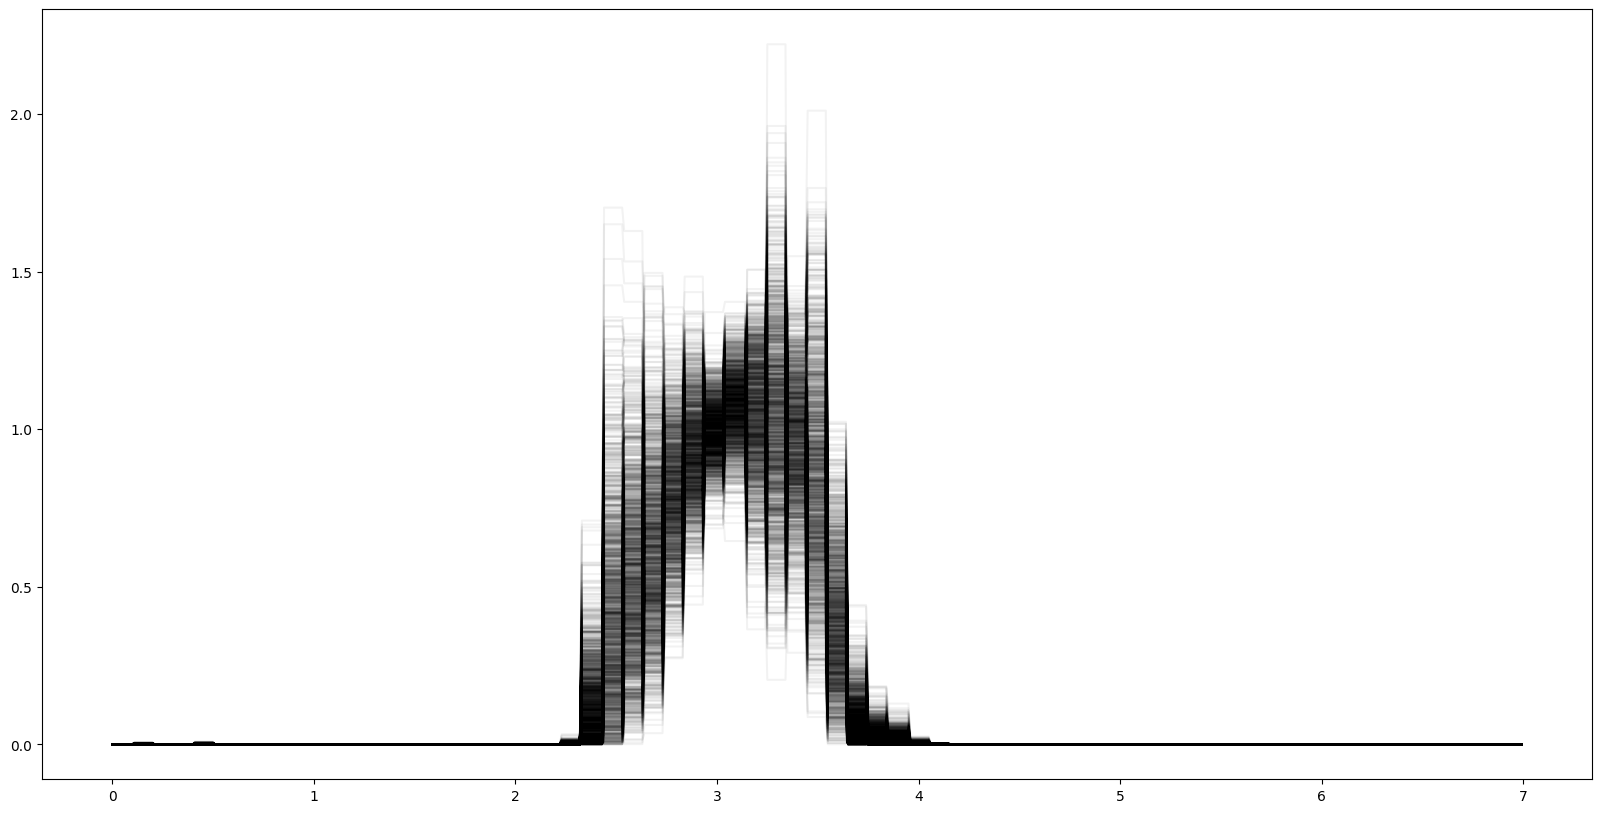

In [6]:
model.plot_nzs(model.u_pca(4, 2000))

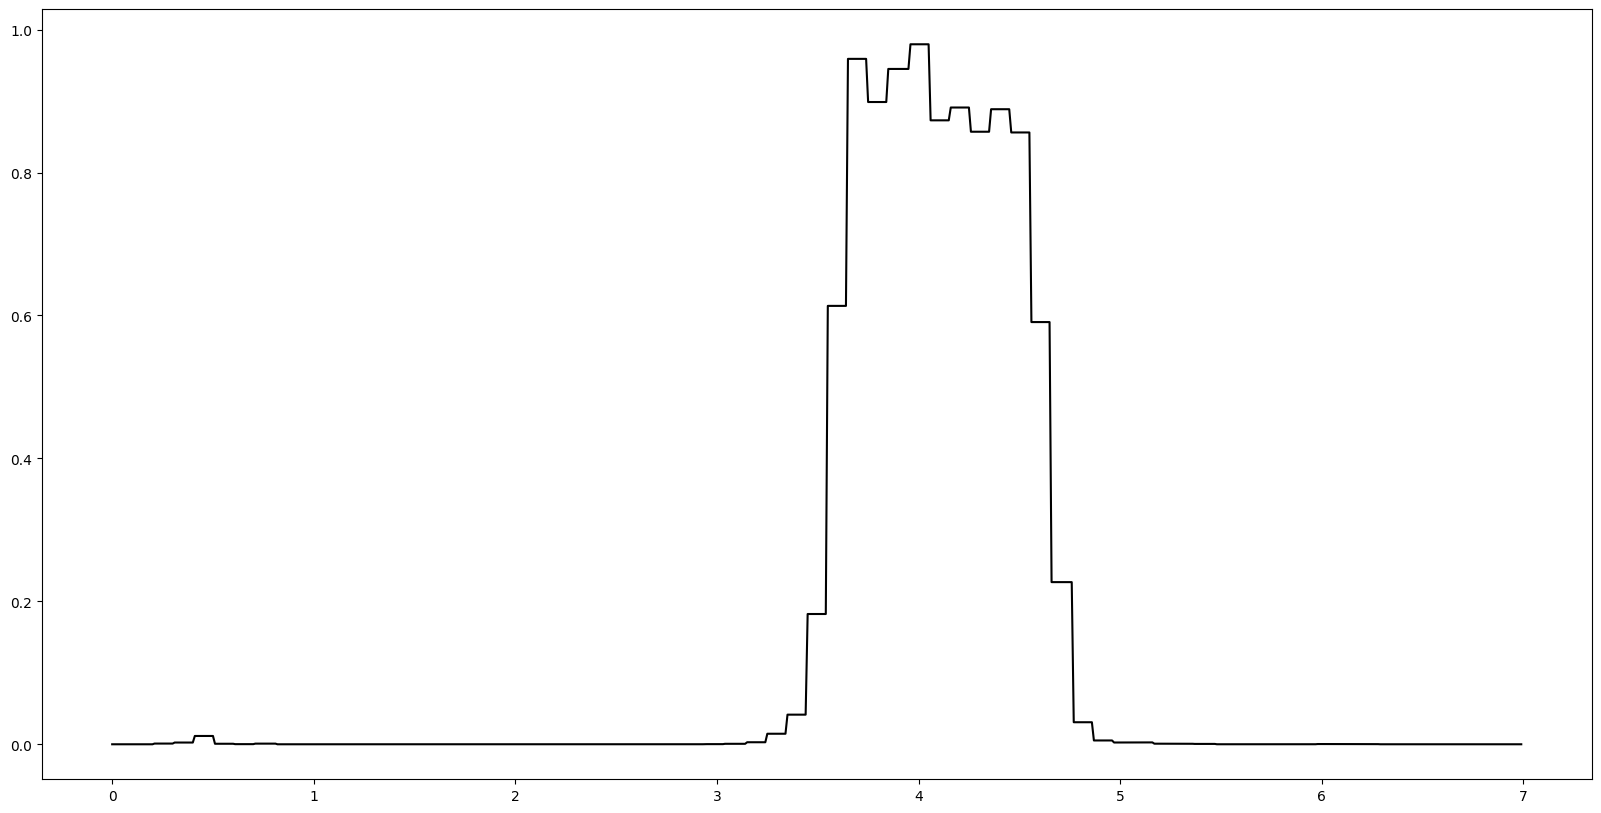

In [7]:
nzs = model.g_pca(4, 100)
nz = nzs[0]
model.plot_nzs(np.array([nz]), alpha=1)

In [8]:
model.interloper_fraction(nz)

0.0016958449630442986

In [9]:
model.normalisation(nz)

1.0

In [10]:
from nz_model import perform_npca
from nz_model import gauss_npca

In [11]:
bin_data = model.u_data()
components = 10

In [12]:
bin_pca = perform_npca(bin_data, components)

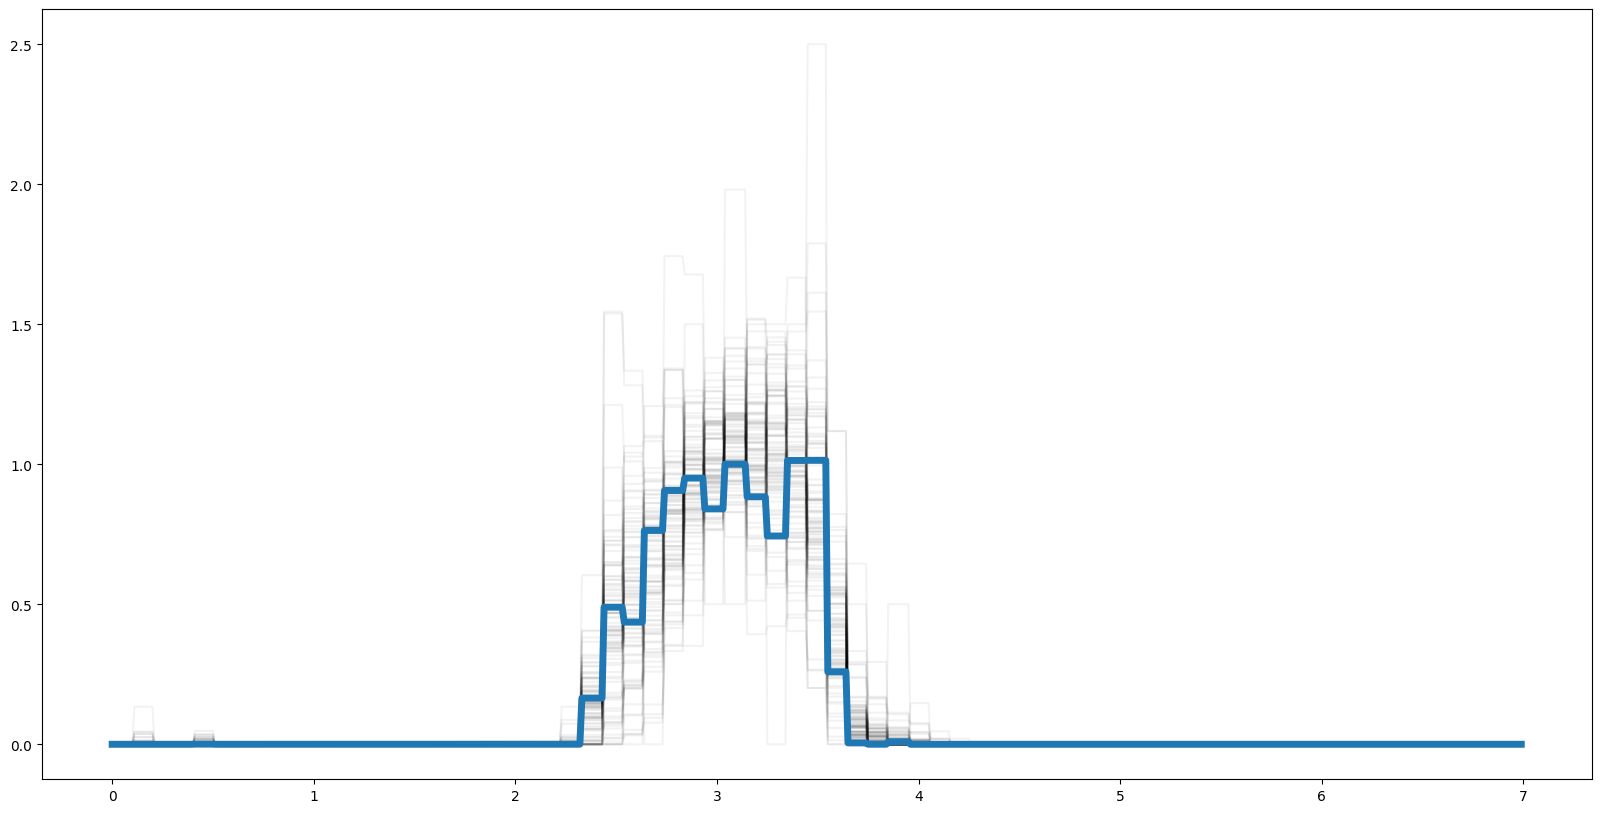

In [13]:
model.plot_nzs(bin_data)
plt.plot(z_space, gauss_npca(bin_pca, 1)[0], lw=5)

In [14]:
model.save_4pca_data()

In [15]:
nz_u = u_dropout((0.5, 0.5, 0.5, 0.5), gals_per_arcmin2 = 1)

In [16]:
arr = []
for z in z_space:
    arr.append(nz_u.pz_fn(z))
    
nzz = np.array(arr)

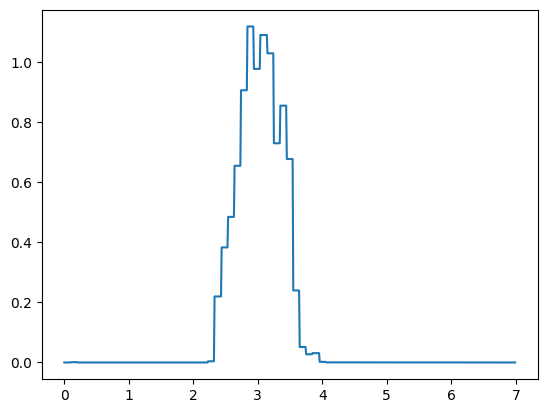

In [17]:
plt.plot(z_space, nzz)

In [18]:
means = np.load("4pca_data/4pca_means_g.npy")
means

array([ 7.72715225e-16,  6.32827124e-17,  1.36002321e-16, -8.36830605e-16])

In [19]:
cov = np.load("4pca_data/4pca_cov_g.npy")
cov

array([[ 3.28193345e+00, -1.10658225e-15,  6.50130940e-17,
        -3.90195064e-16],
       [-1.10658225e-15,  1.64900647e+00, -2.31406970e-15,
         2.44026791e-16],
       [ 6.50130940e-17, -2.31406970e-15,  4.01496004e-01,
        -9.64116820e-18],
       [-3.90195064e-16,  2.44026791e-16, -9.64116820e-18,
         2.45949786e-01]])

In [20]:
nz_params = np.random.multivariate_normal(means, cov)

In [21]:
nz_g = g_dropout(nz_params, gals_per_arcmin2 = 1)

In [22]:
arr = []
for z in z_space:
    arr.append(nz_g.pz_fn(z))
    
nzz = np.array(arr)

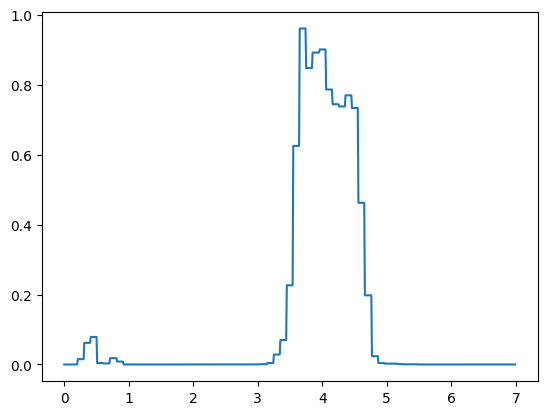

In [23]:
plt.plot(z_space, nzz)